# XGBoost Regressor Project

# TV Newspaper Radio Dataset from kaggle

In [67]:
#Basic Packages 
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
df=pd.read_csv(r"C:\Users\Lokanathswami\Downloads\Advertising.csv") # r for Reading file from localsystem
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [69]:
df.drop(df.columns[0], axis =1,inplace=True) # dropping columns by indexwise
#df.drop(['A'], axis=1)
#df.drop(['B','C'], axis=1)
#df.drop(columns=['B', 'C'])
#del df['column_name'] Or del df.column_name
#df.drop(df.columns[[0]], axis=1, inplace=True) inplace so that the original data can be modified without creating a copy.


In [70]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
type(df)

pandas.core.frame.DataFrame

In [72]:
df.shape

(200, 4)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [74]:
# veryfing Null values Columnwise if present shows true
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [75]:
# veryfing count of  Null values Columnwise
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [76]:
# Checking Stastics 
df.describe()  

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


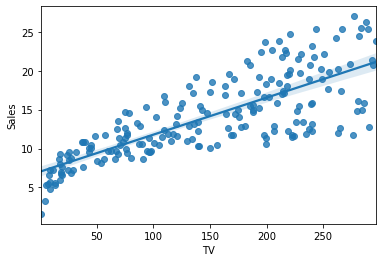

In [77]:
# Checking relationship of TV,Radio,Newspaper with Sales without  algorithm by drawing regression plot
# Checking best fit line 
sns.regplot(x='TV',y='Sales',data=df) # Displays scatterplot
plt.show()

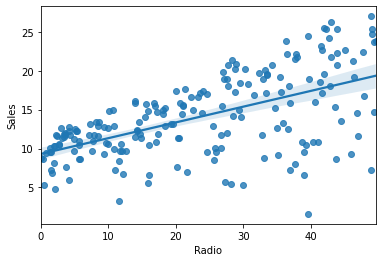

In [78]:
sns.regplot(x='Radio',y='Sales',data=df) # Displays scatterplot
plt.show()

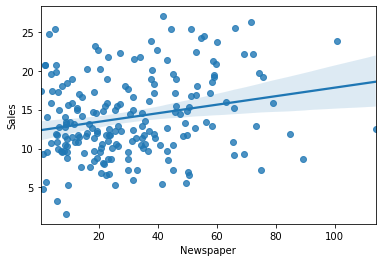

In [79]:
sns.regplot(x='Newspaper',y='Sales',data=df) # Displays scatterplot
plt.show()

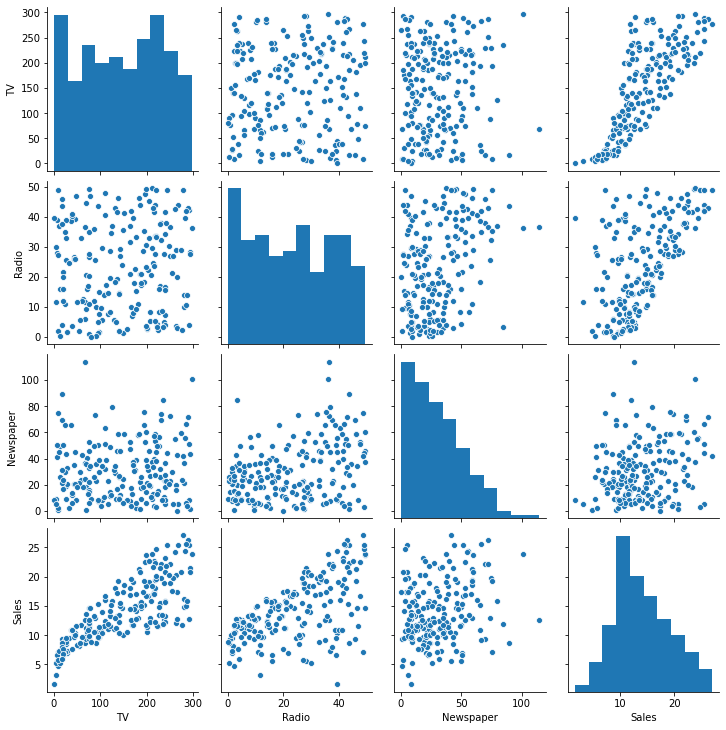

In [81]:
#Checking scatterplot and histogram of each column
sns.pairplot(df)
plt.show()

In [82]:
# Checking Coreletions
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


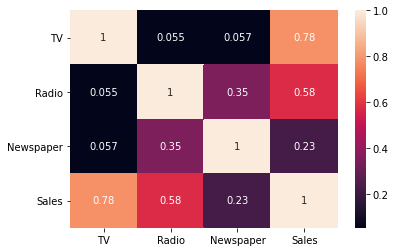

In [83]:
#Plotting correlation on heatmap
sns.heatmap(df.corr(),annot=True) # annot-TO display Numbers all details
plt.show() #to plot on plain Notebook not a subplot

In [84]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [85]:
df.iloc[:,0]  # Taking All rows and 0 index column

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [86]:
df.iloc[:,0:1] # Passing range to convert into dataframe. (Range 0:1) last No index is excluded

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [88]:
# We are already in Dataframe to converts into 2D array without reshape we use .values
df.iloc[:,0:1].values

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [89]:
# Storing Values
X=df.iloc[:,0:1].values  # x values for 0 index column i.e TV
Y=df.iloc[:,3].values    # for only 3rd index column i.e sales

In [90]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [91]:
Y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

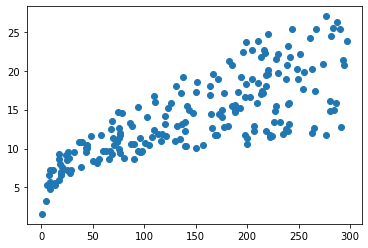

In [92]:
#Just Checking X and Y
plt.scatter(X,Y)
plt.show()

In [93]:
#Splitting The Datsets train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)


In [94]:
x_train

array([[239.9],
       [220.5],
       [ 44.7],
       [197.6],
       [ 56.2],
       [  5.4],
       [198.9],
       [262.9],
       [215.4],
       [149.7],
       [ 57.5],
       [163.3],
       [296.4],
       [121. ],
       [ 39.5],
       [168.4],
       [112.9],
       [213.4],
       [248.4],
       [ 96.2],
       [184.9],
       [218.4],
       [284.3],
       [273.7],
       [218.5],
       [214.7],
       [227.2],
       [287.6],
       [151.5],
       [210.7],
       [  8.7],
       [ 97.5],
       [237.4],
       [230.1],
       [171.3],
       [ 13.1],
       [240.1],
       [109.8],
       [165.6],
       [222.4],
       [102.7],
       [193.7],
       [289.7],
       [261.3],
       [120.5],
       [206.9],
       [ 17.9],
       [205. ],
       [  8.6],
       [ 53.5],
       [ 36.9],
       [ 18.8],
       [107.4],
       [ 95.7],
       [232.1],
       [ 94.2],
       [ 97.2],
       [ 76.4],
       [170.2],
       [156.6],
       [139.3],
       [241.7],
       [

In [95]:
y_train

array([23.2, 20.1, 10.1, 16.6,  8.7,  5.3, 23.7, 12. , 17.1, 17.3, 11.8,
       16.9, 23.8, 11.6, 10.8, 11.7, 11.9, 17. , 20.2, 11.4, 15.5, 18. ,
       15. , 20.8, 12.2, 17.4, 14.8, 26.2, 18.5, 18.4,  7.2,  9.7, 18.9,
       22.1, 19. ,  5.3, 15.9, 16.7, 12.6, 11.7, 14. , 19.2, 25.4, 24.2,
       14.2, 12.9,  8. , 22.6,  4.8,  8.1, 10.8,  7. , 11.5,  9.5, 13.4,
        9.7,  9.6, 11.8, 11.7, 10.5, 13.4, 21.8, 11.8, 18. , 19.8, 22.6,
        9.7, 19.4, 11.6, 11.3, 19. , 15.2, 10.1, 10.6, 14.5, 19.7, 14.1,
       11. , 18. , 20.2, 22.3, 10.6, 14.7, 12.8, 21.7, 18.9,  7.3, 18.3,
       10.9, 12.7, 12.5,  5.7, 11.2, 11.3, 16. , 10.3, 10.7, 12.3, 20.7,
        1.6, 17.4, 10.3,  6.6, 13.4, 12.9,  6.9, 10.5, 11.9, 12.8, 17.3,
       13.6, 14.9,  9.7, 11.6,  9.5, 13.2, 12.9, 17.2,  7.6, 11.5, 20.7,
        5.6, 12.2, 17.1, 21.2, 11.4,  8.7, 14.9, 15.6, 19.6, 11.7,  6.7,
       10.4, 14.6,  5.5, 22.4, 14.8, 11. , 10.1,  8.5, 14.6, 14.7, 21.5,
       19.2, 10.4,  8.6, 15.7, 14.4, 15.5, 12.9, 24

In [ ]:
# conda install -c anaconda py-xgboost       #to install xgboost

In [99]:

import xgboost as xgb
xgb_model=xgb.XGBRegressor(objective='reg:linear')
xgb_model.fit(x_train,y_train)

[22:16:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [100]:
xgb_model=xgb.XGBRegressor(objective='reg:squarederror')      # 'reg:squarederror'   for regression problem
xgb_model.fit(x_train,y_train)

XGBRegressor(objective='reg:squarederror')

In [101]:
xgb_model.predict(x_test)

array([ 9.997183 , 11.873761 ,  7.7221317,  7.465523 , 11.873761 ,
       18.100029 , 20.418856 , 10.188395 , 10.188395 , 14.962847 ,
        7.465523 ,  7.7221317, 18.784092 , 18.758762 , 17.66708  ,
       13.336835 , 17.454954 , 11.873761 , 19.8371   , 18.199621 ,
       11.873761 , 17.848059 , 11.771971 , 17.66708  , 17.995646 ,
       11.771971 , 19.8371   , 11.748761 , 13.336835 , 17.995646 ,
        7.7221317, 24.722237 ,  7.7221317, 13.549799 , 16.00481  ,
        7.465523 , 11.873761 , 13.667554 , 19.8371   ,  7.7221317],
      dtype=float32)

In [102]:
y_predicted=xgb_model.predict(x_test)  

In [103]:
# Checking Training score
xgb_model.score(x_train,y_train)*100  

81.90479220459433

In [104]:
# Checking Testing score
xgb_model.score(x_test,y_test)*100

56.44170908381787

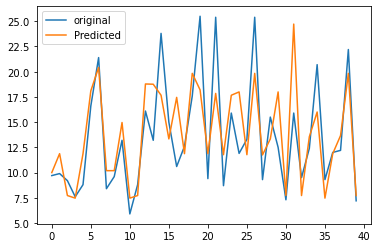

In [105]:
plt.plot(y_test,label='original')
plt.plot(y_predicted,label='Predicted')
plt.legend()  #plotting original value to predicted value
plt.show()

# Done